In [11]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame , read_csv
import numpy as np

In [13]:
# variables
rvc_records_file = 'c91bedb0-5fa7-4d3d-80c4-fd4a3bbafdc0.csv'
obis_records_file = 'FKNMS.csv'

In [14]:
rvc_data = pd.read_csv(rvc_records_file, low_memory=False)
obis_data = pd.read_csv(obis_records_file, low_memory=False)

In [15]:
print(tabulate([
    ['# records', len(rvc_data), len(obis_data)]
], headers=['', 'RVC only', 'ALL OBIS']))

             RVC only    ALL OBIS
---------  ----------  ----------
# records       61547      142758


'Haemulon plumierii'

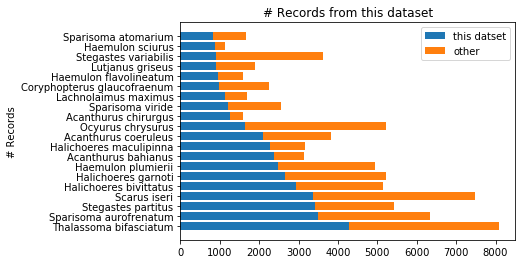

In [61]:
TOP_N = 20
datas_counts = rvc_data['aphiaID'].value_counts()[:TOP_N]
total_counts = obis_data['aphiaID'].value_counts()
ind = np.arange(TOP_N)    # the x locations for the groups

species_names = []
others_counts = []
these_counts = []
percent_counts = []

for aphia_id in datas_counts.index:
    these_counts.append(datas_counts[aphia_id])
    others_counts.append(total_counts[aphia_id] - these_counts[-1])
    #species_names.append(aphia_id)
    species_names.append(rvc_data[rvc_data["aphiaID"] == aphia_id]["scientificName"].iloc[0])
    percent_counts.append(total_counts[aphia_id] / datas_counts[aphia_id])
    
p1 = plt.barh(ind, these_counts)
p2 = plt.barh(ind, others_counts, left=these_counts)

plt.ylabel('# Records')
plt.title('# Records from this dataset')
plt.yticks(ind, species_names)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('this datset', 'other'))

plt.show()
